# PDSeI - Redes Neuronales convolucionales

# Integrantes:

1. Calderón Alvarado, Jeremy Lorenzo

2. Carrillo Guevara, Abigail Bibiana

3. Condor Flores, César Emilio


Base de datos: https://www.kaggle.com/datasets/datamunge/sign-language-mnist

# Conexión con kaggle

# Instalaciones previas

In [ ]:
!pip install -q kaggle
!pip install -q scikeras

In [ ]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt

files.upload()

KeyboardInterrupt: 

# Descargar la base de datos

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d datamunge/sign-language-mnist
!unzip sign-language-mnist.zip

Dataset URL: https://www.kaggle.com/datasets/datamunge/sign-language-mnist
License(s): CC0-1.0
 99% 62.0M/62.6M [00:03<00:00, 24.1MB/s]
100% 62.6M/62.6M [00:03<00:00, 17.3MB/s]
Archive:  sign-language-mnist.zip
  inflating: amer_sign2.png          
  inflating: amer_sign3.png          
  inflating: american_sign_language.PNG  
  inflating: sign_mnist_test.csv     
  inflating: sign_mnist_test/sign_mnist_test.csv  
  inflating: sign_mnist_train.csv    
  inflating: sign_mnist_train/sign_mnist_train.csv  


# Lectura de datos

In [ ]:
train_df = pd.read_csv("sign_mnist_train.csv")
test_df = pd.read_csv("sign_mnist_test.csv")

In [ ]:
print(train_df.keys())

Index(['label', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=785)


In [ ]:
# Elementos por clase

class_counts = train_df['label'].value_counts()
print(class_counts)

label
17    1294
16    1279
11    1241
22    1225
5     1204
18    1199
14    1196
3     1196
19    1186
23    1164
8     1162
20    1161
13    1151
2     1144
0     1126
24    1118
10    1114
6     1090
15    1088
21    1082
12    1055
7     1013
1     1010
4      957
Name: count, dtype: int64


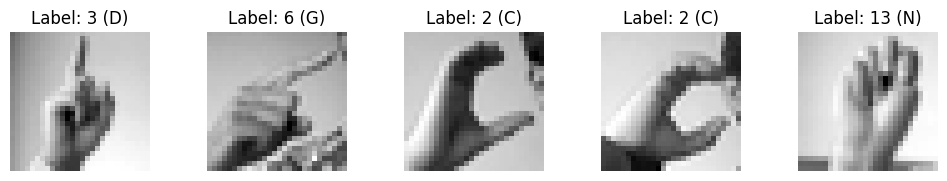

In [ ]:
import matplotlib.pyplot as plt

label_mapping = {
    0: 'A',
    1: 'B',
    2: 'C',
    3: 'D',
    4: 'E',
    5: 'F',
    6: 'G',
    7: 'H',
    8: 'I',
    9: 'J',
    10: 'K',
    11: 'L',
    12: 'M',
    13: 'N',
    14: 'O',
    15: 'P',
    16: 'Q',
    17: 'R',
    18: 'S',
    19: 'T',
    20: 'U',
    21: 'V',
    22: 'W',
    23: 'X',
    24: 'Y',
    25: 'Z'
}

def plot_images(data, labels, num=5):
    fig, axes = plt.subplots(1, num, figsize=(10, 2))
    fig.tight_layout()

    for i in range(num):
        ax = axes[i]
        ax.imshow(data[i].reshape(28, 28), cmap='gray')
        ax.set_title(f'Label: {labels[i]} ({label_mapping[labels[i]]})')
        ax.axis('off')

    plt.show()

plot_images(train_df.iloc[:, 1:].values, train_df['label'].values)

# Transformación de datos

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

batch_size = 32

X_train = train_df.iloc[:, 1:].values.reshape(-1, 28, 28, 1) / 255.0
y_train = train_df['label'].values

X_val = test_df.iloc[:, 1:].values.reshape(-1, 28, 28, 1) / 255.0
y_val = test_df['label'].values

# Data Augmentation

In [ ]:
datagen_train = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True)

train_generator = datagen_train.flow(
    X_train,
    y_train,
    batch_size=batch_size)

datagen_val = ImageDataGenerator()
val_generator = datagen_val.flow(X_val, y_val, batch_size=batch_size)



```
1. ¿Qué es el data augmentation y cómo puede beneficiar el entrenamiento de una CNN?
El data augmentation consiste en generar artificialmente diversas imágenes de entrenamiento a partir de cada imagen inicial aplicándoles transformaciones aleatorias (rotaciones, recortes, espejado, cambio de brillo).
El data augmentation permite aumentar la diversidad del dataset y mejora el rendimiento de las CNN en el procesamiento de imágenes, porque reduce el sobreajuste y mejora la robustez del modelo frente a variaciones en los datos.


2. ¿Por qué es importante normalizar los datos de entrada y qué impacto tiene en el rendimiento del modelo?
*   Acelera la convergencia del optimizador, mejorando la eficiencia del entrenamiento.
*   Permite iniciar el entrenamiento de la CNN cerca a un punto óptimo.
*   Reduce la varianza del modelo, ya que los valores se encuentran en un rango específico ([-1,1] o [0,1]).
*   Corrije datos duplicados y anomalías en la base de datos.
*   Evita la creación y actualización de relaciones y dependencias no deseadas entre datos.

```



# Creación del modelo

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(26, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 26)                  │           3,354 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 132,954 (519.35 KB)

 Trainable params: 132,954 (519.35 KB)

 Non-trainable params: 0 (0.00 B)



```
1. ¿Qué función cumplen las capas Conv2D y MaxPooling2D en una CNN?
La capa conv2D crea un núcleo de convolución (con el uso de filtros) que se encarga de calcular el producto escalar entre el valor de los píxeles de la entrada y una región conectada a ella (región local), lo cual produce un tensor de salidas.
La capa MaxPooling2D reduce la cantidad de datos entre una capa y otra, preservando la información más relevante y controlando el sobreajuste, lo que facilita el procesamiento de imágenes y entrenamiento de la CNN.

2. ¿Qué es el Dropout y cómo ayuda a prevenir el sobreajuste en redes neuronales?
El Dropout es una técnica de regularización que se basa en la eliminación de neuronas en las capas de la red neuronal que es aplicada en base a la probabilidad dada por la distribución de Bernoulli.
Esta técnica ayuda a prevenir el sobreajuste en redes neuronales, porque:
*   Reduce la dependencia entre neuronas.
*   Fuerza a la red a generalizar mejor.
*   Mejora la robustez del modelo.

3. ¿Por qué se utiliza la función de activación ReLU en las capas ocultas y cuáles son sus ventajas?
La función de activación ReLU se utiliza en las capas ocultas, porque permite convertir combinaciones lineales de entradas en salidas no lineales, permitiendo capturar relaciones más complejas. Para ello analiza si el valor de entrada es positivo o negativo; cuando es negativo devuelve un valor 0 en la salida, y cuando es positivo ó 0 devuleve el mismo valor de entrada en la salida.
Ventajas:
*   Menor coste computacional.
*   Acelera la convergencia del gradiente.
*   Permite que capas profundas aprendan de manera eficiente.
*   Facilita entrenamiento de la red neuronal.

4. ¿Qué hace la función de activación softmax en la capa de salida y en qué tipo de problemas se utiliza comúnmente?
La función de activación softmax se utiliza en la capa de salida de una red neuronal para realizar la clasificación multiclase. Permite convertir los valores de salida de la capa anterior en probablidades que suman 1. Las cuales se usan para medir la confianza del modelo en la pertenencia a cada clase.
Esta función se utiliza en problemas de clasificación multiclase para determinar la clase con mayor probabilidad.

5. ¿Qué es el tamaño del filtro (filter size) en una capa convolucional y cómo impacta la calidad de las características extraídas?
El tamaño del filtro define la región sobre la que la convolución opera. Es una matriz cuadrada bidimensional que se aplica a cada capa convolucional que puede ser de 3x3, 5x5 o 7x7.
El impacto de la calidad de las características extraídas se basan en que:
*   Filtros pequeños capturan detalles finos.
*   Filtros grandes capturan características más globales pero aumentan la complejidad.

6. ¿Qué efecto tiene un stride mayor que 1 en la resolución de la salida de una capa convolucional?
El stride es el número de píxeles en los que el filtro se mueve a la derecha cada vez.
Por tanto, un stride mayor que 1 reduce la resolución espacial de la salida, lo que ayuda a que el procesamiento sea más veloz, pero puede ocasionar pérdida de cierta información (detalles pequeños).

7. ¿Cómo se debe seleccionar el tamaño del filtro y el stride para optimizar el balance entre la extracción de características y la complejidad del modelo?
Normalmente se empieza con un stride pequeño (1 o 2) y un filtro pequeño (3x3) para captar los detalles, moviéndose luego a strides y filtros de mayor tamaño para captar características más generales.
```



# Terminación anticipada y Checkpoints

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_accuracy')

In [ ]:
class CustomModelCheckpoint(ModelCheckpoint):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.best_val_accuracy = -float('inf')

    def on_epoch_end(self, epoch, logs=None):
        current_val_accuracy = logs.get('val_accuracy')

        if current_val_accuracy and current_val_accuracy > self.best_val_accuracy:
            self.best_val_accuracy = current_val_accuracy
            print(f" Modelo guardado época {epoch + 1} con exactitud: {current_val_accuracy:.4f}")

        super().on_epoch_end(epoch, logs)

custom_model_checkpoint = CustomModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_accuracy')



```
1. ¿Qué es el EarlyStopping y cómo contribuye a mejorar el proceso de entrenamiento de un modelo?
EarlyStopping detiene el entrenamiento si la métrica de validación no mejora tras un número de épocas. En este caso la métrica de validación es la pérdida y la "paciencia" (número de épocas en las que se espera a que la métrica mejore) es de 5 épocas.
Su contribución en la mejora del proceso de entrenamiento radica en que evita el sobreentrenamiento (overfitting), reduciendo así los recursos computacionales empleados y permitiendo una mejor generalización del modelo.

2. ¿Cuál es la función de ModelCheckpoint y por qué es útil guardar el mejor modelo durante el entrenamiento?
ModelCheckpoint guarda el modelo cada vez que mejora en alguna métrica (como la precisión). Así se asegura de poder recuperar el mejor modelo logrado.
Porque no siempre el mejor modelo se obtiene al final del entrenamiento. Así, cuando se termina el entrenamiento, se puede elegir la mejor opción entre todos los modelos guardados.
```



# Entrenamiento

In [ ]:
epochs = 5

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=epochs,
    # callbacks=[early_stopping, model_checkpoint]
    callbacks=[early_stopping, custom_model_checkpoint]
)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


850/858 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.1132 - loss: 2.9446 Modelo guardado época 1 con exactitud: 0.5722
858/858 ━━━━━━━━━━━━━━━━━━━━ 28s 25ms/step - accuracy: 0.1144 - loss: 2.9399 - val_accuracy: 0.5722 - val_loss: 1.3511
Epoch 2/5
857/858 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4889 - loss: 1.5226 Modelo guardado época 2 con exactitud: 0.7107
858/858 ━━━━━━━━━━━━━━━━━━━━ 15s 17ms/step - accuracy: 0.4890 - loss: 1.5222 - val_accuracy: 0.7107 - val_loss: 0.7704
Epoch 3/5
855/858 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6299 - loss: 1.0509 Modelo guardado época 3 con exactitud: 0.7776
858/858 ━━━━━━━━━━━━━━━━━━━━ 15s 17ms/step - accuracy: 0.6300 - loss: 1.0506 - val_accuracy: 0.7776 - val_loss: 0.5874
Epoch 4/5
849/858 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7127 - loss: 0.8055 Modelo guardado época 4 con exactitud: 0.8747
858/858 ━━━━━━━━━━━━━━━━━━━━ 15s 17ms/step - accuracy: 0.7129 - loss: 0.8051 - val_accuracy: 0.8747 - val_loss: 0.3627
Epoch 



```
1. ¿Qué significa el parámetro epochs y cómo afecta al entrenamiento de un modelo?
El parámetro epochs ("épocas") indica cuántas veces el modelo analizará todo el dataset de entrenamiento.
Más épocas permiten al modelo obtener mejores resultados al darle más tiempo para aprender.
Por otro lado, también aumentan el riesgo de sobreajuste, lo que impide al modelo funcionar de manera satisfactoria con datasets distintos al de entrenamiento.

2. ¿Cuál es la diferencia entre train_generator y val_generator en el contexto del entrenamiento y la validación del modelo?
train_generator: Alimenta el modelo con datos de entrenamiento.
val_generator: Valida el modelo durante el entrenamiento sin influir en el aprendizaje.
```



# Predicciones

225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


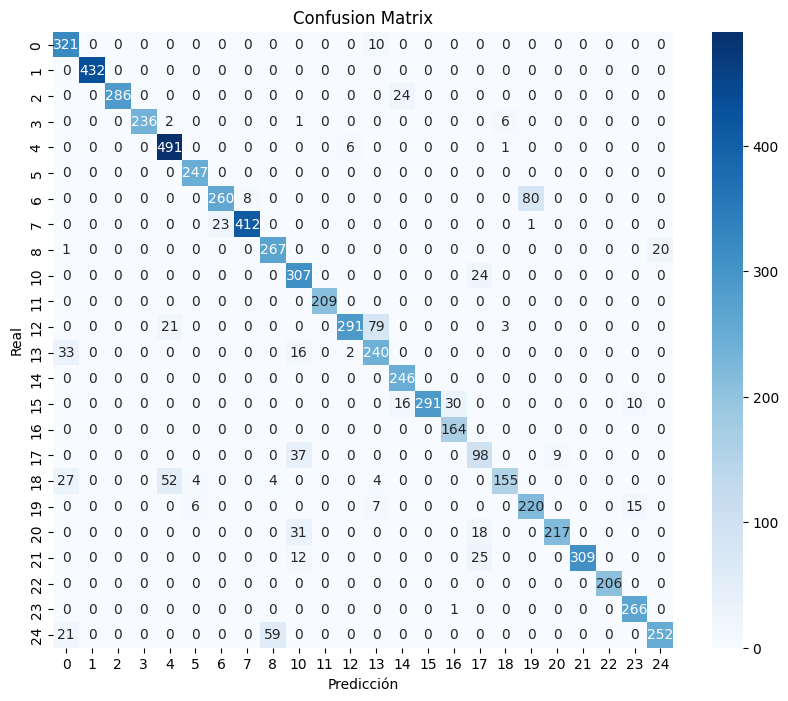

              precision    recall  f1-score   support

           0       0.80      0.97      0.87       331
           1       1.00      1.00      1.00       432
          10       1.00      0.92      0.96       310
          11       1.00      0.96      0.98       245
          12       0.87      0.99      0.92       498
          13       0.96      1.00      0.98       247
          14       0.92      0.75      0.82       348
          15       0.98      0.94      0.96       436
          16       0.81      0.93      0.86       288
          17       0.76      0.93      0.84       331
          18       1.00      1.00      1.00       209
          19       0.97      0.74      0.84       394
           2       0.71      0.82      0.76       291
          20       0.86      1.00      0.92       246
          21       1.00      0.84      0.91       347
          22       0.84      1.00      0.91       164
          23       0.59      0.68      0.63       144
          24       0.94    

In [ ]:
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import seaborn as sns

best_model = load_model('best_model.keras')

X_test = test_df.iloc[:, 1:].values.astype('float32') / 255.0
y_test = test_df['label'].values

X_test = X_test.reshape(-1, 28, 28, 1)

predictions = best_model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)

conf_matrix = confusion_matrix(y_test, predicted_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(y_test, predicted_classes, target_names=np.unique(y_test.astype(str))))

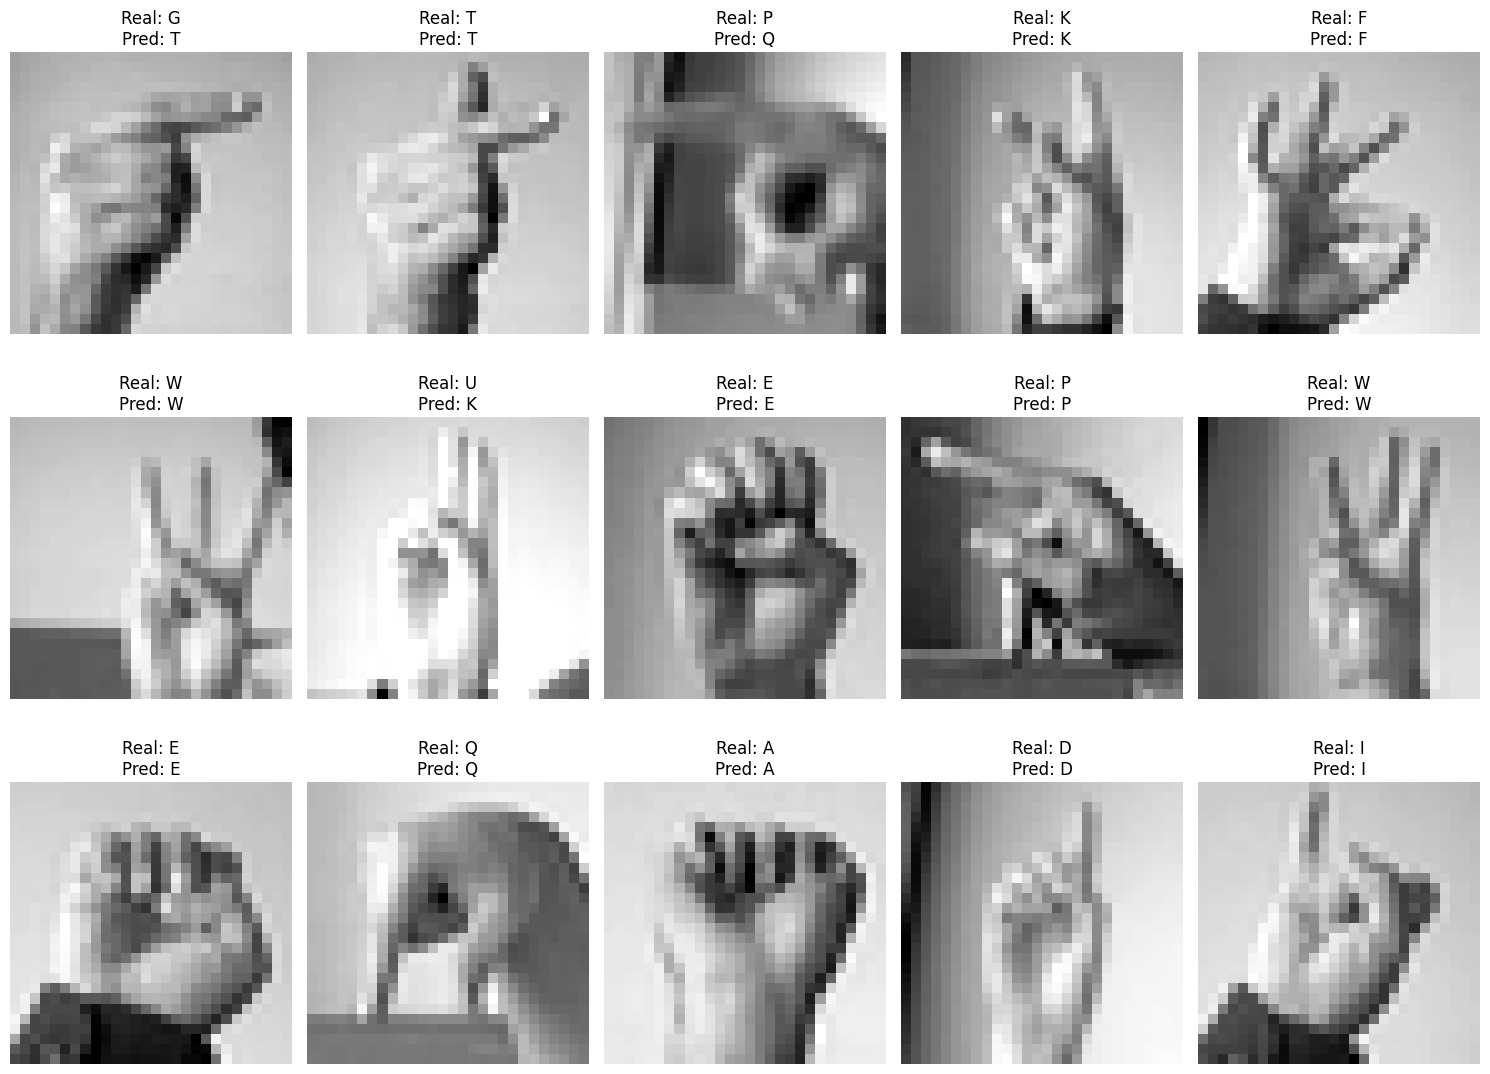

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

num_images_to_show = 15
indices = np.random.choice(len(X_test), num_images_to_show, replace=False)
images_per_row = 5

plt.figure(figsize=(15, 15))
for i, idx in enumerate(indices):
    plt.subplot(num_images_to_show // images_per_row + 1, images_per_row, i + 1)
    plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f'Real: {label_mapping[y_test[idx]]}\nPred: {label_mapping[predicted_classes[idx]]}')
    plt.axis('off')

plt.tight_layout()
plt.show()



```
1. ¿Qué es la confusion_matrix y qué información proporciona sobre el rendimiento del modelo?
La matriz de confusión (confusion_matrix) es un cuadro de doble entrada que muestra de manera detallada las predicciones correctas e incorrectas para cada clase.
Por un lado se muestran las clases reales, mientras que por el otro se muestran las predicciones.
La intersección de cada clase real con la misma clase predicha se encuentra en la diagonal de la matriz, donde se ubica el número de predicciones realizadas correctamente.
Los errores se ubican fuera de la diagonal.

2. ¿Cómo se interpreta el classification_report y qué métricas se incluyen en él?

El classification_report es una herramienta que permite evaluar el rendimiento de un modelo de clasificación. Este reporte muestra una serie de métricas clave, que evalúan qué tan bien
un modelo de clasificación ha logrado predecir las etiquetas de una clase en comparación con sus valores reales.

Las métricas principales incluidas en el classification_report son:

*Precision: mide la proporción de verdaderos positivos entre los positivos predichos.
*Recall o Sensitivity: mide la proporción de verdaderos positivos entre el total de elementos realmente positivos. Indica qué tan bien el modelo captura las instancias positivas reales.
*F1-score: es la media armónica de la precisión y la exhaustividad. Cuando las clases están desbalanceadas, ya que proporciona una métrica única que equilibra ambas.
*Support: es el número de muestras verdaderas de cada clase en el conjunto de datos de prueba.

3. ¿Por qué es importante utilizar el conjunto de prueba (X_test y y_test) para evaluar el modelo?

Es fundamental utilizar el conjunto de prueba (X_test y y_test) para evaluar el modelo porque permite medir su rendimiento en datos no vistos, simulando su comportamiento en un entorno real.
Estas son las principales razones:

*Evaluación de Generalización: El objetivo de un modelo es generalizar bien en nuevos datos, no solo en aquellos que ha visto durante su entrenamiento. Usar un conjunto de prueba separado
permite comprobar cómo se desempeña el modelo en datos que no conoce.
*Evitar el Sobreajuste (Overfitting): Durante el entrenamiento, el modelo se ajusta a los patrones en los datos de entrenamiento, pero también puede aprender ruido o detalles específicos de ese
conjunto, lo cual no es deseable. La evaluación en el conjunto de prueba permite detectar si el modelo ha aprendido patrones útiles o simplemente ha memorizado el conjunto de entrenamiento.
*Comparación de Modelos: Para elegir el mejor modelo entre varias alternativas, es necesario evaluar cada uno en un conjunto de prueba común. Esto permite una comparación objetiva, ya que todos
los modelos se prueban con datos que no han sido usados en el entrenamiento.
*Evitar la Optimización Incorrecta: Sin un conjunto de prueba, podríamos caer en la tentación de ajustar continuamente el modelo para mejorar el rendimiento en los datos de entrenamiento.
Al usar X_test y y_test, se establece un límite claro entre el entrenamiento y la evaluación, evitando ajustes indebidos basados en el conjunto de prueba.

4. ¿Qué rol juega la función np.argmax en el proceso de obtención de clases predichas?

La función np.argmax en el proceso de obtención de clases predichas juega el rol de identificar la clase con la probabilidad más alta en los resultados de un modelo de clasificación. Es clave
para transformar las probabilidades generadas por el modelo en etiquetas de clase concretas.

5. ¿Qué información visual adicional proporciona un mapa de calor (heatmap) de la matriz de confusión?

Proporciona la siguiente información adicional:

*Claridad Visual de los Errores y Aciertos: El uso de colores en un heatmap resalta las celdas donde el modelo ha acertado y donde ha cometido errores.
*Identificación de Clases Confundidas: La matriz de confusión muestra cómo las instancias de cada clase real son clasificadas, incluyendo los casos incorrectamente asignados a otras clases.
*Relación entre Clases: El mapa de calor permite observar relaciones o patrones específicos entre clases.
*Información Intuitiva para Ajuste del Modelo: Los patrones visuales ayudan a decidir si se necesita mejorar la precisión general del modelo o si es necesario enfocarse en mejorar el
reconocimiento de ciertas clases.
*Representación de Desbalance de Clases: En un heatmap, es fácil observar si ciertas clases están sobre-representadas o si el modelo tiende a predecir una clase específica debido al desbalance.

```



# Refinamiento

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout,Input
from scikeras.wrappers import KerasClassifier

def create_model(optimizer='adam', **kwargs):
    dropout_rate = kwargs.get('dropout_rate', 0.5)
    model = Sequential([
        Input((28, 28, 1)),
        Conv2D(32, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(dropout_rate),
        Dense(26, activation='softmax')
    ])
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


In [ ]:
from sklearn.model_selection import GridSearchCV

epochs = 1
model = KerasClassifier(build_fn=create_model, epochs=epochs, batch_size=32, verbose=0)

param_grid = {
    'model__optimizer': ['SGD', 'Adam'],
    'model__dropout_rate': [0.2, 0.5, 0.7]
}

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)

grid_result = grid.fit(X_train, y_train)

print(f"Mejor: {grid_result.best_score_} usando {grid_result.best_params_}")

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Mejor: 0.8768900946156165 usando {'model__dropout_rate': 0.2, 'model__optimizer': 'Adam'}


In [ ]:
val_accuracy = grid_result.best_estimator_.score(X_val, y_val)
print(f"Validation Accuracy: {val_accuracy}")

Validation Accuracy: 0.862520914668154




```
1. ¿Qué es GridSearchCV y cómo se utiliza para optimizar el rendimiento de un modelo?

GridSearchCV selecciona la configuración que maximiza el rendimiento del modelo según una métrica especificada (como precisión, F1-score, etc.).
Para utilizar GridSearchCV como primer paso el usuario debe definir los hiperparámetros del modelo que se desea optimizar y un rango de valores posibles
para cada uno. GridSearchCV prueba todas las combinaciones posibles de los hiperparámetros especificados. Para cada combinación de hiperparámetros,
GridSearchCV aplica validación cruzada, dividiendo los datos en varios conjuntos de entrenamiento y prueba para evaluar el rendimiento de cada combinación
de forma más robusta. Por último para la selección de la mejor combinación GridSearchCV selecciona la combinación de hiperparámetros que obtiene el mejor
rendimiento promedio en los conjuntos de prueba generados durante la validación cruzada.

2. ¿Qué representan los parámetros en param_grid y por qué es importante ajustar el optimizador y la tasa de dropout?

En GridSearchCV, el parámetro "param_grid" representa el espacio de búsqueda de hiperparámetros que queremos optimizar para encontrar la mejor combinación
que maximice el rendimiento del modelo. "param_grid" es un diccionario donde cada clave es un hiperparámetro del modelo que se desea ajustar y cada valor es una
lista de posibles valores para ese hiperparámetro. "param_grid" podría incluir hiperparámetros como optimizer, learning_rate y dropout_rate.
El optimizador controla cómo se actualizan los pesos del modelo para minimizar la función de pérdida. Seleccionar el optimizador adecuado ayuda a que el modelo
converja de manera más rápida y estable, lo cual es clave para obtener buenos resultados. Por otro lado, ajustar esta tasa es importante porque una tasa de dropout
muy baja podría permitir que el modelo memorice los datos de entrenamiento, resultando en sobreajuste y una tasa de dropout muy alta podría hacer que el modelo
aprenda de manera ineficiente, perdiendo patrones clave y aumentando el error.

3. ¿Qué significa el parámetro cv=3 en el contexto de la validación cruzada y cómo influye en la evaluación del modelo?

El parámetro cv=3 en el contexto de la validación cruzada indica que los datos se dividirán en 3 folds o subconjuntos para evaluar el rendimiento del modelo. Esto
se conoce como "3-fold cross-validation". Este parámetro influye en la reducción del Sesgo de Evaluación, estabilidad de la métrica de rendimiento y balance
entre costo computacional y robustez.
```
